In [28]:
# Section 007 Group 02 Basketball Player Position Classification
# This project will include KNN classification for different basketball player positions based on player's physical and game statstics
# That being said, the algorithm will be able to predict a basketball player just entering any parameters

In [29]:
### The necessary Libraries required
library(tidyverse)
library(stringr)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'tests.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [30]:
# ?str_detect

In [31]:
player_data <- read_csv("data/player_data.csv")
season_data <- read_csv("data/Seasons_Stats.csv")

player_data
season_data

Parsed with column specification:
cols(
  name = col_character(),
  year_start = col_double(),
  year_end = col_double(),
  position = col_character(),
  height = col_character(),
  weight = col_double(),
  birth_date = col_character(),
  college = col_character()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  Player = col_character(),
  Pos = col_character(),
  Tm = col_character(),
  GS = col_logical(),
  `3PAr` = col_logical(),
  `ORB%` = col_logical(),
  `DRB%` = col_logical(),
  `TRB%` = col_logical(),
  `AST%` = col_logical(),
  `STL%` = col_logical(),
  `BLK%` = col_logical(),
  `TOV%` = col_logical(),
  `USG%` = col_logical(),
  blanl = col_logical(),
  blank2 = col_logical(),
  OBPM = col_logical(),
  DBPM = col_logical(),
  BPM = col_logical(),
  VORP = col_logical(),
  `3P` = col_logical()
  # ... with 7 more columns
)

See spec(...) for full column specifications.

Warning message:
“394102 

name,year_start,year_end,position,height,weight,birth_date,college
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
Alaa Abdelnaby,1991,1995,F-C,6-10,240,"June 24, 1968",Duke University
Zaid Abdul-Aziz,1969,1978,C-F,6-9,235,"April 7, 1946",Iowa State University
Kareem Abdul-Jabbar,1970,1989,C,7-2,225,"April 16, 1947","University of California, Los Angeles"
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Bill Zopf,1971,1971,G,6-1,170,"June 7, 1948",Duquesne University
Ivica Zubac,2017,2018,C,7-1,265,"March 18, 1997",NA
Matt Zunic,1949,1949,G-F,6-3,195,"December 19, 1919",George Washington University


X1,Year,Player,Pos,Age,Tm,G,GS,MP,PER,⋯,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<lgl>,<dbl>,<dbl>,⋯,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>
0,1950,Curly Armstrong,G-F,31,FTW,63,NA,NA,NA,⋯,0.705,NA,NA,NA,176,NA,NA,NA,217,458
1,1950,Cliff Barker,SG,29,INO,49,NA,NA,NA,⋯,0.708,NA,NA,NA,109,NA,NA,NA,99,279
2,1950,Leo Barnhorst,SF,25,CHS,67,NA,NA,NA,⋯,0.698,NA,NA,NA,140,NA,NA,NA,192,438
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
24688,2017,Stephen Zimmerman,C,20,ORL,19,FALSE,108,7.3,⋯,0.600,NA,NA,35,4,NA,NA,NA,17,23
24689,2017,Paul Zipser,SF,22,CHI,44,NA,843,6.9,⋯,0.775,NA,NA,125,36,NA,NA,NA,78,240
24690,2017,Ivica Zubac,C,19,LAL,38,NA,609,17.0,⋯,0.653,NA,NA,159,30,NA,NA,NA,66,284


In [32]:
## Now that we loaded our stats the next step is to wrangle. There is a bunch of information that is not required in the knn analysis

In [33]:
#Wrangling
#We only want players in 2017, this is the most current reported data

season_data_2017 <- filter(season_data, Year == "2017") %>%
                    group_by(Player)
season_data_2017

X1,Year,Player,Pos,Age,Tm,G,GS,MP,PER,⋯,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<lgl>,<dbl>,<dbl>,⋯,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>
24096,2017,Alex Abrines,SG,23,OKC,68,NA,1055,10.1,⋯,0.898,NA,NA,86,40,NA,NA,NA,114,406
24097,2017,Quincy Acy,PF,26,TOT,38,TRUE,558,11.8,⋯,0.750,NA,NA,115,18,NA,NA,NA,67,222
24098,2017,Quincy Acy,PF,26,DAL,6,FALSE,48,-1.4,⋯,0.667,NA,NA,8,0,FALSE,FALSE,NA,9,13
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
24688,2017,Stephen Zimmerman,C,20,ORL,19,FALSE,108,7.3,⋯,0.600,NA,NA,35,4,NA,NA,NA,17,23
24689,2017,Paul Zipser,SF,22,CHI,44,NA,843,6.9,⋯,0.775,NA,NA,125,36,NA,NA,NA,78,240
24690,2017,Ivica Zubac,C,19,LAL,38,NA,609,17.0,⋯,0.653,NA,NA,159,30,NA,NA,NA,66,284


In [34]:
#convert wanted parameters to class
season_data_2017 <- season_data_2017 %>%
    mutate(Year = as.numeric(Year)) %>%
    mutate(Player = as_factor(Player)) %>%
    mutate(PPG = PTS/G) %>%
    mutate(APG = AST/G) %>%
    mutate(RPG = TRB/G) %>%
    #select(Player, PPG, APG, RPG, SPG, BPG, "3P%","2P%", "FT%", "FG%" ) %>%
    filter(!is.na(PPG)) %>%
    filter(!is.na(APG)) %>%
    filter(!is.na(RPG)) %>%
    filter(!is.na("2P%")) %>%
    filter(!is.na("FT%")) %>%
    filter(!is.na("FG%")) 
# season_data_2017

In [35]:
pulled_season_data_2017 <- season_data_2017 %>%
                           select(Player,Pos,PPG,APG,RPG,"2P%","FT%","FG%")
pulled_season_data_2017

Player,Pos,PPG,APG,RPG,2P%,FT%,FG%
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alex Abrines,SG,5.970588,0.5882353,1.264706,0.426,0.898,0.393
Quincy Acy,PF,5.842105,0.4736842,3.026316,0.413,0.750,0.412
Quincy Acy,PF,2.166667,0.0000000,1.333333,0.400,0.667,0.294
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Stephen Zimmerman,C,1.210526,0.2105263,1.842105,0.323,0.600,0.323
Paul Zipser,SF,5.454545,0.8181818,2.840909,0.451,0.775,0.398
Ivica Zubac,C,7.473684,0.7894737,4.184211,0.536,0.653,0.529


In [36]:
player_data_2017 <- player_data %>%
                    mutate(year_start = as.numeric(year_start)) %>%
                    mutate(year_end = as.numeric(year_end)) %>%
                    mutate(Player = (name)) %>%
                    group_by(Player)
player_data_2017

name,year_start,year_end,position,height,weight,birth_date,college,Player
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
Alaa Abdelnaby,1991,1995,F-C,6-10,240,"June 24, 1968",Duke University,Alaa Abdelnaby
Zaid Abdul-Aziz,1969,1978,C-F,6-9,235,"April 7, 1946",Iowa State University,Zaid Abdul-Aziz
Kareem Abdul-Jabbar,1970,1989,C,7-2,225,"April 16, 1947","University of California, Los Angeles",Kareem Abdul-Jabbar
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Bill Zopf,1971,1971,G,6-1,170,"June 7, 1948",Duquesne University,Bill Zopf
Ivica Zubac,2017,2018,C,7-1,265,"March 18, 1997",NA,Ivica Zubac
Matt Zunic,1949,1949,G-F,6-3,195,"December 19, 1919",George Washington University,Matt Zunic


In [37]:
player_data_2017 <- filter(player_data_2017, year_start <= 2017, year_end >= 2017) %>%
                    group_by(name)
player_data_2017

name,year_start,year_end,position,height,weight,birth_date,college,Player
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
Alex Abrines,2017,2018,G-F,6-6,190,"August 1, 1993",NA,Alex Abrines
Quincy Acy,2013,2018,F,6-7,240,"October 6, 1990",Baylor University,Quincy Acy
Steven Adams,2014,2018,C,7-0,255,"July 20, 1993",University of Pittsburgh,Steven Adams
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Stephen Zimmerman,2017,2017,C,7-0,240,"September 9, 1996","University of Nevada, Las Vegas",Stephen Zimmerman
Paul Zipser,2017,2018,G-F,6-8,215,"February 18, 1994",NA,Paul Zipser
Ivica Zubac,2017,2018,C,7-1,265,"March 18, 1997",NA,Ivica Zubac


In [38]:
feet <- str_extract(player_data_2017$height,"^[0-9]")

inches <- str_extract(player_data_2017$height,"[0-9]+$")

feet_as_numeric <- as.numeric(feet)
inches_as_numeric <- as.numeric(inches)

feet_cm <- (feet_as_numeric)*30.48
inches_cm <- (inches_as_numeric)* 2.54

height_cm <- feet_cm + inches_cm

In [39]:
height_t <- ((as.numeric(str_extract(player_data_2017$height,"^[0-9]")))*30.48) + ((as.numeric(str_extract(player_data_2017$height,"[0-9]+$")))*2.54)

In [41]:
player_data_2017 <- player_data_2017 %>%
    mutate(height_cm = ((as.numeric(str_extract((height),"^[0-9]")))*30.48) + ((as.numeric(str_extract((height),"[0-9]+$")))*2.54)) %>%
    summarize(across(na.rm = TRUE))
player_data_2017

name,year_start,year_end,position,height,weight,birth_date,college,Player,height_cm
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
A.J. Hammons,2017,2017,C,7-0,260,"August 27, 1992",Purdue University,A.J. Hammons,213.36
Aaron Brooks,2008,2018,G,6-0,161,"January 14, 1985",University of Oregon,Aaron Brooks,182.88
Aaron Gordon,2015,2018,F,6-9,220,"September 16, 1995",University of Arizona,Aaron Gordon,205.74
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Zach LaVine,2015,2017,G,6-5,189,"March 10, 1995","University of California, Los Angeles",Zach LaVine,195.58
Zach Randolph,2002,2018,F-C,6-9,260,"July 16, 1981",Michigan State University,Zach Randolph,205.74
Zaza Pachulia,2004,2018,C,6-11,270,"February 10, 1984",NA,Zaza Pachulia,210.82


In [42]:
pulled_player_data_2017 <- player_data_2017 %>%
                           select(Player,weight,height_cm)
pulled_player_data_2017

Player,weight,height_cm
<chr>,<dbl>,<dbl>
A.J. Hammons,260,213.36
Aaron Brooks,161,182.88
Aaron Gordon,220,205.74
⋮,⋮,⋮
Zach LaVine,189,195.58
Zach Randolph,260,205.74
Zaza Pachulia,270,210.82


In [43]:
basketball_data_2017 <- merge(pulled_season_data_2017,pulled_player_data_2017, by = "Player")
basketball_data_2017

Player,Pos,PPG,APG,RPG,2P%,FT%,FG%,weight,height_cm
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A.J. Hammons,C,2.181818,0.1818182,1.636364,0.375,0.450,0.405,260,213.36
Aaron Brooks,PG,4.953846,1.9230769,1.061538,0.424,0.800,0.403,161,182.88
Aaron Gordon,SF,12.737500,1.8750000,5.062500,0.528,0.719,0.454,220,205.74
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Zach LaVine,SG,18.914894,2.957447,3.382979,0.515,0.836,0.459,189,195.58
Zach Randolph,PF,14.082192,1.671233,8.191781,0.474,0.731,0.449,260,205.74
Zaza Pachulia,C,6.085714,1.885714,5.857143,0.538,0.778,0.534,270,210.82


In [44]:
basketball_data_2017 <- basketball_data_2017 %>%
                        mutate(basketball_data_2017, Pos = as_factor(Pos)) %>%
                        rename(Two_Point_Percentage = "2P%", Free_Throw_Percentage = "FT%" , Field_Goal_Percentage = "FG%", Weight = weight, Height_cm = height_cm)
basketball_data_2017

Player,Pos,PPG,APG,RPG,Two_Point_Percentage,Free_Throw_Percentage,Field_Goal_Percentage,Weight,Height_cm
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A.J. Hammons,C,2.181818,0.1818182,1.636364,0.375,0.450,0.405,260,213.36
Aaron Brooks,PG,4.953846,1.9230769,1.061538,0.424,0.800,0.403,161,182.88
Aaron Gordon,SF,12.737500,1.8750000,5.062500,0.528,0.719,0.454,220,205.74
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Zach LaVine,SG,18.914894,2.957447,3.382979,0.515,0.836,0.459,189,195.58
Zach Randolph,PF,14.082192,1.671233,8.191781,0.474,0.731,0.449,260,205.74
Zaza Pachulia,C,6.085714,1.885714,5.857143,0.538,0.778,0.534,270,210.82


In [45]:
basketball_data_2017 <- basketball_data_2017 %>%   
# #                         filter(!is.na(Player)) %>%
# #                         filter(!is.na(Pos)) %>% 
#                         filter(!is.na(PPG)) %>%
#                         filter(!is.na(APG)) %>%
#                         filter(!is.na(RPG)) %>%
                        filter(!is.na(Two_Point_Percentage)) %>%
                        filter(!is.na(Free_Throw_Percentage)) %>%
                        filter(!is.na(Field_Goal_Percentage)) %>%
                        filter(!is.na(Weight)) %>%
                        filter(!is.na(Height_cm)) 
basketball_data_2017

Player,Pos,PPG,APG,RPG,Two_Point_Percentage,Free_Throw_Percentage,Field_Goal_Percentage,Weight,Height_cm
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A.J. Hammons,C,2.181818,0.1818182,1.636364,0.375,0.450,0.405,260,213.36
Aaron Brooks,PG,4.953846,1.9230769,1.061538,0.424,0.800,0.403,161,182.88
Aaron Gordon,SF,12.737500,1.8750000,5.062500,0.528,0.719,0.454,220,205.74
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Zach LaVine,SG,18.914894,2.957447,3.382979,0.515,0.836,0.459,189,195.58
Zach Randolph,PF,14.082192,1.671233,8.191781,0.474,0.731,0.449,260,205.74
Zaza Pachulia,C,6.085714,1.885714,5.857143,0.538,0.778,0.534,270,210.82


In [46]:
set.seed(2002)
player_split <- initial_split(basketball_data_2017, prop = 0.75, strata = Pos) 
player_train <- training(player_split)   
player_test <- testing(player_split)
player_train
player_test

,Player,Pos,PPG,APG,RPG,Two_Point_Percentage,Free_Throw_Percentage,Field_Goal_Percentage,Weight,Height_cm
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A.J. Hammons,C,2.181818,0.1818182,1.636364,0.375,0.45,0.405,260,213.36
2,Aaron Brooks,PG,4.953846,1.9230769,1.061538,0.424,0.80,0.403,161,182.88
4,Aaron Harrison,SG,0.200000,0.6000000,0.600000,0.000,0.50,0.000,210,198.12
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
564,Zach LaVine,SG,18.914894,2.957447,3.382979,0.515,0.836,0.459,189,195.58
565,Zach Randolph,PF,14.082192,1.671233,8.191781,0.474,0.731,0.449,260,205.74
566,Zaza Pachulia,C,6.085714,1.885714,5.857143,0.538,0.778,0.534,270,210.82


,Player,Pos,PPG,APG,RPG,Two_Point_Percentage,Free_Throw_Percentage,Field_Goal_Percentage,Weight,Height_cm
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,Aaron Gordon,SF,12.737500,1.8750000,5.062500,0.528,0.719,0.454,220,205.74
9,Alan Anderson,SF,2.866667,0.3666667,0.800000,0.444,0.750,0.375,220,198.12
10,Alan Williams,C,7.361702,0.4893617,6.212766,0.519,0.625,0.517,260,203.20
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
540,Tyler Zeller,C,3.490196,0.8235294,2.431373,0.497,0.564,0.494,253,213.36
544,Tyson Chandler,C,8.446809,0.6382979,11.468085,0.671,0.734,0.671,240,215.90
552,Wayne Selden,SG,5.333333,0.3333333,1.666667,1.000,0.500,0.625,230,195.58


In [47]:
#Number of rows in Training Data to determine the range of k-values needed.
number_of_rows <- nrow(player_train)
number_of_rows

[1] 427

In [48]:
set.seed(2002)
player_recipe <- recipe(Pos ~ PPG + APG + RPG + Two_Point_Percentage + Free_Throw_Percentage + Field_Goal_Percentage + Weight + Height_cm, data = player_train) %>%
                        step_scale(all_predictors()) %>%
                        step_center(all_predictors())
player_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          8

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [49]:
#seed is set
set.seed(2002)

#define tuning engine
player_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
      set_engine("kknn") %>%
      set_mode("classification")
player_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [50]:
set.seed(2002) 

#Perform Cross Validation on Data (5-fold)

player_vfold <- vfold_cv(player_train, v = 5, strata = Pos)

In [55]:
set.seed(2002)
#Tibble of k-values
k_vals <- tibble(neighbors = seq(from = 1, to = 50))
# k_vals

player_results <- workflow() %>%
                 add_recipe(player_recipe) %>%
                 add_model(player_tune) %>%
                 tune_grid(resamples = player_vfold, grid = k_vals) %>%
                 collect_metrics()
player_results

! Fold1: internal: No observations were detected in `truth` for level(s): 'PF-C'
...

! Fold2: internal: No observations were detected in `truth` for level(s): 'PF-C'
...

! Fold3: internal: No observations were detected in `truth` for level(s): 'PF-C'
...

! Fold4: internal: No observations were detected in `truth` for level(s): 'PF-C'
...



neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.6844084,5,0.017024699,Model01
1,roc_auc,hand_till,0.7917347,5,0.009166911,Model01
2,accuracy,multiclass,0.6844084,5,0.017024699,Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
49,roc_auc,hand_till,0.8899928,5,0.01146634,Model49
50,accuracy,multiclass,0.6351623,5,0.02158630,Model50
50,roc_auc,hand_till,0.8888539,5,0.01094488,Model50


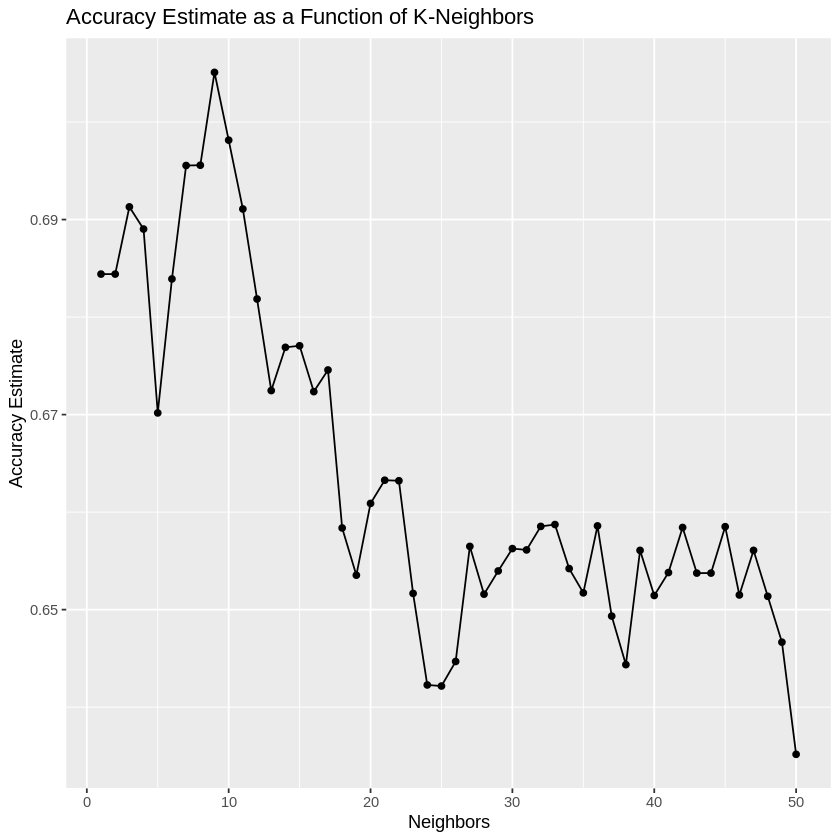

In [56]:
accuracies <- player_results %>% 
      filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      ggtitle("Accuracy Estimate as a Function of K-Neighbors")
accuracy_versus_k

In [60]:
#9 Neighbors Clearly Works the Best
#Trying for High Values of K seems to be pointless and Runs super slow

best_k_val <- 9

In [61]:
#Begin Fitting

player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k_val) %>%
       set_engine("kknn") %>%
       set_mode("classification")

player_recipe <- recipe(Pos ~ PPG + APG + RPG + Two_Point_Percentage + Free_Throw_Percentage + Field_Goal_Percentage + Weight + Height_cm, data = player_train) %>%
                        step_scale(all_predictors()) %>%
                        step_center(all_predictors())

player_fit <- workflow() %>%
             add_recipe(player_recipe) %>%
             add_model(player_spec) %>%
            fit(data = player_train)
player_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~best_k_val,     kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2903981
Best kernel: rectangular
Best k: 9

In [ ]:
player_predictions <- predict(player_fit, player_test) %>%
                        bind_cols(player_test)

player_metrics <- player_predictions %>% metrics(truth = Pos, estimate = .pred_class)

mnist_conf_mat <- mnist_predictions %>%
                        conf_mat(truth = y, estimate = .pred_class) 
mnist_metrics
mnist_conf_mat